# ODE Finite Difference Method

The **finite difference method** can also be used to solve ODEs.

We can use finite difference formulas at evenly spaced grid points to approximate the differential equations. This way, we can transform a differential equation into a system of algebraic equations to solve. 

In the finite difference method, the derivatives in the differential equation are approximated using the finite difference formulas. We can divide the the interval of $[a, b]$ into $n$ equal subintervals of length $h$.

Commonly, we usually use the central difference formulas in the finite difference methods due to the fact that they yield better accuracy. The differential equation is enforced only at the grid points, and the first and second derivatives are:

$$\frac{dy}{dx} = \frac{y_{i+1}-y_{i-1}}{2h}$$

$$\frac{d^2y}{dx^2} = \frac{y_{i-1}-2y_i+y_{i+1}}{h^2}$$

These finite difference expressions are used to replace the derivatives of $y$ in the differential equation.

This leads to a system of $n+1$ linear algebraic equations if the differential equation is linear.

If the differential equation is nonlinear, the algebraic equations will also be nonlinear. 



## Example:

Let's consider a 2nd order ordinary differential equation:

$$\frac{d^2f(x)}{dx^2} = -10$$

if the independent variable is over the domain of [0, 20]. Let's take $n=10$. 

Since the time interval is $[0, 20]$ and we have $n=10$, therefore, $h=2.0$, using the finite difference approximated derivatives, we have 

$$ f_0 = 500$$

$$ f_{i-1} - 2f_i + f_{i+1} = -10h^2, \;i = 1, 2, ..., n-1$$

$$ f_{10} = 100$$

if we use matrix notation, we will have:

$$\begin{bmatrix}
1 & 0 & & & \\
1 & -2 & 1 & &  \\
 & \ddots & \ddots & \ddots & \\
 & & 1& -2& 1 \\
 & & & &1
\end{bmatrix}\left[\begin{array}{c} f_0 \\f_1 \\ ... \\ f_{n-1}\\f_n \end{array}\right] =
\left[\begin{array}{c} 500 \\-10h^2 \\ ... \\ -10h^2 \\100\end{array}\right]$$

Therefore, we have 11 equations in the system, we can solve it using the method

### Analytical solution:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define function f(x)
f_x = lambda x, s: -5*x**2 + 80*x + 500 # this is y(x)

# Spacing
h_1 = 0.1

# Initial/boundary conditions
x_00 = 0.
x_20 = 20.

f_00 = 500.
f_20 = 100.

# x_axis
x_axis = np.arange(x_00, x_20 + h_1, h_1)

In [3]:
# DEFINE n
n = 10

# Define h

h = (x_20 - x_00)/n

# Get the matrix A
A = np.zeros((n+1, n+1))

print(A)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [4]:
A[0, 0] = 1
A[n, n] = 1

print(A)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [5]:
for i in range(1, n):

    A[i, i-1] = 1
    A[i, i]   = -2
    A[i, i+1] = 1    

print(A)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


In [6]:
# Create b vector

b = np.zeros(n+1)
print(b)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
b[0]  = 500
b[-1] = 100

print(b)

[500.   0.   0.   0.   0.   0.   0.   0.   0.   0. 100.]


In [8]:
b[1:-1] = -10*h**2

print(b)

[500. -40. -40. -40. -40. -40. -40. -40. -40. -40. 100.]


In [9]:
# Solve system of n+1 eqs.

f = np.linalg.solve(A, b)  # A @ b

print(f)

[500. 640. 740. 800. 820. 800. 740. 640. 500. 320. 100.]


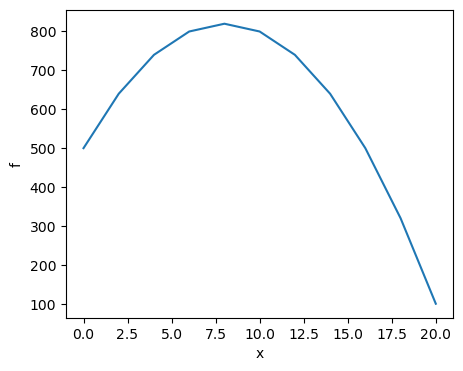

In [10]:
# PLotting

x = np.linspace(0, 20, n+1)

plt.figure(figsize=(5,4))
plt.plot(x, f)

plt.xlabel('x')
plt.ylabel('f')
plt.show()


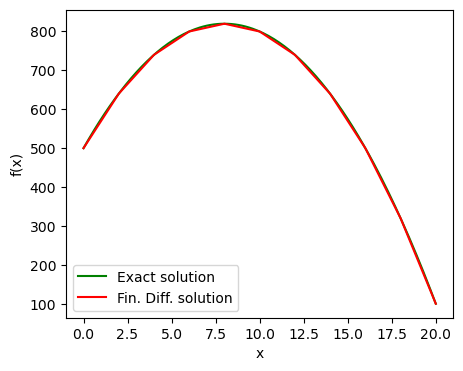

In [11]:
# Plotting

plt.figure(figsize = (5,4))

plt.plot(x_axis, f_x(x_axis, f_00), "g", label = "Exact solution")
plt.plot(x, f, "r", label = "Fin. Diff. solution")

plt.xlabel('x')
plt.ylabel('f(x)')

#plt.xlim(0,2.0)
#plt.ylim(0,1.1)

plt.legend()
plt.show()